# Run the model match on 20 doamin models

In [24]:
import subprocess

from tqdm import tqdm


def run_another_python_script_with_args(script_path, arg1):
    try:
        subprocess.run(["python", script_path, arg1], check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")


# Example: Running "example_script_with_args.py" with arguments "value1" and "value2"
script_path = "model_matching.py"
from tqdm import tqdm

import os
import shutil

In [ ]:
# for i in tqdm(range(0, 11)):
#     print(i)
#     run_another_python_script_with_args(script_path, str(i + 1))

# Helper Function

In [25]:
def calculate_result_cls(solution: dict):
    score_cls = 0
    total_cls = 0
    score_atr = 0
    total_atr = 0

    for key in solution:
        total_cls += 1
        score_cls += solution[key]["score"]

        for atr in solution[key]["attributes"]:
            total_atr += 1
            score_atr += solution[key]["attributes"][atr]["score"]

    return score_cls, total_cls, score_atr, total_atr

In [26]:
def calculate_result_rel(solution: dict):
    score_rel = 0
    total_rel = 0

    for rel in solution:
        total_rel += 1
        score_rel += rel["score"]

    return score_rel, total_rel

# Algorithm evaluation: match evaluation

In [7]:
import subprocess

from tqdm import tqdm


def run_another_python_script_with_args(script_path, arg1):
    try:
        subprocess.run(["python", script_path, arg1], check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")


# Example: Running "example_script_with_args.py" with arguments "value1" and "value2"
script_path = "model_matching_v2.py"
from tqdm import tqdm

import os
import shutil
import json

# Specify the directory path
directory_path = "/smart_home/"

# Create the directory if it doesn't exist
from pprint import pprint

result = []
for i in tqdm(range(1, 21)):
    directory_path_root = "smart_home/"
    g = str(i)
    print(g, " =" * 20)
    # run_another_python_script_with_args(script_path, g)
    directory_path = directory_path_root + g + "/human_eval"

    directory_path = directory_path_root + g + "/result/algo_evaluation.txt"
    print(directory_path)

    with open(directory_path, "r") as file:
        # Read the entire file content
        file_content = json.load(file)
        result.append(file_content)
        # pprint(file_content)

100%|██████████| 20/20 [00:00<00:00, 199.51it/s]

1  = = = = = = = = = = = = = = = = = = = =
smart_home/1/result/algo_evaluation.txt
2  = = = = = = = = = = = = = = = = = = = =
smart_home/2/result/algo_evaluation.txt
3  = = = = = = = = = = = = = = = = = = = =
smart_home/3/result/algo_evaluation.txt
4  = = = = = = = = = = = = = = = = = = = =
smart_home/4/result/algo_evaluation.txt
5  = = = = = = = = = = = = = = = = = = = =
smart_home/5/result/algo_evaluation.txt
6  = = = = = = = = = = = = = = = = = = = =
smart_home/6/result/algo_evaluation.txt
7  = = = = = = = = = = = = = = = = = = = =
smart_home/7/result/algo_evaluation.txt
8  = = = = = = = = = = = = = = = = = = = =
smart_home/8/result/algo_evaluation.txt
9  = = = = = = = = = = = = = = = = = = = =
smart_home/9/result/algo_evaluation.txt
10  = = = = = = = = = = = = = = = = = = = =
smart_home/10/result/algo_evaluation.txt
11  = = = = = = = = = = = = = = = = = = = =
smart_home/11/result/algo_evaluation.txt
12  = = = = = = = = = = = = = = = = = = = =
smart_home/12/result/algo_evaluation.tx

In [8]:
import pandas as pd

rows = [[] for i in range(9)]

for d in result:

    rows[0].append(d["class"]["precision"])
    rows[1].append(d["class"]["recall"])
    rows[2].append(d["class"]["f1"])

    rows[3].append(d["attribute"]["precision"])
    rows[4].append(d["attribute"]["recall"])
    rows[5].append(d["attribute"]["f1"])

    rows[6].append(d["relationship"]["precision"])
    rows[7].append(d["relationship"]["recall"])
    rows[8].append(d["relationship"]["f1"])

col = [i + 1 for i in range(len(result))]
index = ["class_pre"]

In [9]:
index = []
for key in result[0]:
    for key_2 in result[0][key]:
        name = key + "_" + key_2
        index.append(name)
index

['class_precision',
 'class_recall',
 'class_f1',
 'attribute_precision',
 'attribute_recall',
 'attribute_f1',
 'relationship_precision',
 'relationship_recall',
 'relationship_f1']

In [10]:
df = pd.DataFrame(rows, columns=col, index=index)

In [11]:
df
column_averages = df.mean()
df["average"] = df.mean(numeric_only=True, axis=1)

df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,average
class_precision,0.681818,0.900000,0.764706,1.000000,0.666667,0.809524,0.652174,0.894737,0.750000,0.904762,...,0.764706,0.608696,0.666667,0.750000,0.571429,0.761905,0.764706,0.681818,0.684211,0.742498
class_recall,1.000000,1.000000,0.866667,1.000000,0.888889,0.944444,0.937500,1.000000,1.000000,1.000000,...,0.928571,0.875000,0.857143,0.833333,0.857143,0.941176,1.000000,0.882353,0.928571,0.933193
class_f1,0.810811,0.947368,0.812500,1.000000,0.761905,0.871795,0.769231,0.944444,0.857143,0.950000,...,0.838710,0.717949,0.750000,0.789474,0.685714,0.842105,0.866667,0.769231,0.787879,0.823940
attribute_precision,0.714286,0.818182,0.833333,0.681818,0.740000,0.760000,0.750000,0.714286,0.900000,0.875000,...,0.900000,0.634615,0.470588,0.552632,0.437500,0.891304,0.687500,0.666667,0.789474,0.727398
attribute_recall,0.555556,0.818182,0.789474,0.750000,0.740000,0.703704,0.666667,0.750000,0.843750,0.823529,...,0.947368,0.970588,0.800000,0.700000,0.875000,0.891304,0.846154,0.750000,1.000000,0.786064
attribute_f1,0.625000,0.818182,0.810811,0.714286,0.740000,0.730769,0.705882,0.731707,0.870968,0.848485,...,0.923077,0.767442,0.592593,0.617647,0.583333,0.891304,0.758621,0.705882,0.882353,0.745605
relationship_precision,0.928571,1.000000,0.846154,1.000000,0.928571,0.875000,0.888889,1.000000,0.636364,0.833333,...,1.000000,1.000000,0.750000,1.000000,0.555556,0.833333,0.583333,0.785714,1.000000,0.855574
relationship_recall,0.764706,1.000000,0.687500,0.846154,0.812500,0.636364,0.727273,1.000000,0.875000,1.000000,...,0.777778,1.000000,0.666667,0.500000,0.384615,0.769231,0.875000,0.687500,0.846154,0.762822
relationship_f1,0.838710,1.000000,0.758621,0.916667,0.866667,0.736842,0.800000,1.000000,0.736842,0.909091,...,0.875000,1.000000,0.705882,0.666667,0.454545,0.800000,0.700000,0.733333,0.916667,0.795777


In [14]:
columns_data = []
for col in df.columns:
    columns_data.append(df[col].tolist())


In [22]:
for index, col in enumerate(columns_data):
    data = []
    for num in col:
        data.append(str(round(num,4)))
    print(index+1)
    print(" & ".join(data))


1
0.6818 & 1.0 & 0.8108 & 0.7143 & 0.5556 & 0.625 & 0.9286 & 0.7647 & 0.8387
2
0.9 & 1.0 & 0.9474 & 0.8182 & 0.8182 & 0.8182 & 1.0 & 1.0 & 1.0
3
0.7647 & 0.8667 & 0.8125 & 0.8333 & 0.7895 & 0.8108 & 0.8462 & 0.6875 & 0.7586
4
1.0 & 1.0 & 1.0 & 0.6818 & 0.75 & 0.7143 & 1.0 & 0.8462 & 0.9167
5
0.6667 & 0.8889 & 0.7619 & 0.74 & 0.74 & 0.74 & 0.9286 & 0.8125 & 0.8667
6
0.8095 & 0.9444 & 0.8718 & 0.76 & 0.7037 & 0.7308 & 0.875 & 0.6364 & 0.7368
7
0.6522 & 0.9375 & 0.7692 & 0.75 & 0.6667 & 0.7059 & 0.8889 & 0.7273 & 0.8
8
0.8947 & 1.0 & 0.9444 & 0.7143 & 0.75 & 0.7317 & 1.0 & 1.0 & 1.0
9
0.75 & 1.0 & 0.8571 & 0.9 & 0.8438 & 0.871 & 0.6364 & 0.875 & 0.7368
10
0.9048 & 1.0 & 0.95 & 0.875 & 0.8235 & 0.8485 & 0.8333 & 1.0 & 0.9091
11
0.5714 & 0.9231 & 0.7059 & 0.7308 & 0.5 & 0.5937 & 0.6667 & 0.4 & 0.5
12
0.7647 & 0.9286 & 0.8387 & 0.9 & 0.9474 & 0.9231 & 1.0 & 0.7778 & 0.875
13
0.6087 & 0.875 & 0.7179 & 0.6346 & 0.9706 & 0.7674 & 1.0 & 1.0 & 1.0
14
0.6667 & 0.8571 & 0.75 & 0.4706 & 0.8 & 0.5926

# Algorithm grading

In [27]:
import subprocess

from tqdm import tqdm


def run_another_python_script_with_args(script_path, arg1):
    try:
        subprocess.run(["python", script_path, arg1], check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")


# Example: Running "example_script_with_args.py" with arguments "value1" and "value2"
script_path = "model_matching_v2.py"
from tqdm import tqdm

import os
import shutil
import json

# Specify the directory path
directory_path = "/smart_home/"

# Create the directory if it doesn't exist
from pprint import pprint

result = []
for i in tqdm(range(1, 21)):
    directory_path_root = "smart_home/"
    g = str(i)
    print(g, " =" * 20)
    # run_another_python_script_with_args(script_path, g)
    directory_path = directory_path_root + g + "/human_eval"

    directory_path = directory_path_root + g + "/result/algo_result.txt"
    print(directory_path)

    with open(directory_path, "r") as file:
        # Read the entire file content
        file_content = json.load(file)
        result.append(file_content)
        # pprint(file_content)

  0%|          | 0/20 [00:00<?, ?it/s]

1  = = = = = = = = = = = = = = = = = = = =
smart_home/1/result/algo_result.txt


 35%|███▌      | 7/20 [00:00<00:00, 23.48it/s]

2  = = = = = = = = = = = = = = = = = = = =
smart_home/2/result/algo_result.txt
3  = = = = = = = = = = = = = = = = = = = =
smart_home/3/result/algo_result.txt
4  = = = = = = = = = = = = = = = = = = = =
smart_home/4/result/algo_result.txt
5  = = = = = = = = = = = = = = = = = = = =
smart_home/5/result/algo_result.txt
6  = = = = = = = = = = = = = = = = = = = =
smart_home/6/result/algo_result.txt
7  = = = = = = = = = = = = = = = = = = = =
smart_home/7/result/algo_result.txt
8  = = = = = = = = = = = = = = = = = = = =
smart_home/8/result/algo_result.txt
9  = = = = = = = = = = = = = = = = = = = =
smart_home/9/result/algo_result.txt
10  = = = = = = = = = = = = = = = = = = = =
smart_home/10/result/algo_result.txt


100%|██████████| 20/20 [00:00<00:00, 33.92it/s]

11  = = = = = = = = = = = = = = = = = = = =
smart_home/11/result/algo_result.txt
12  = = = = = = = = = = = = = = = = = = = =
smart_home/12/result/algo_result.txt
13  = = = = = = = = = = = = = = = = = = = =
smart_home/13/result/algo_result.txt
14  = = = = = = = = = = = = = = = = = = = =
smart_home/14/result/algo_result.txt
15  = = = = = = = = = = = = = = = = = = = =
smart_home/15/result/algo_result.txt
16  = = = = = = = = = = = = = = = = = = = =
smart_home/16/result/algo_result.txt
17  = = = = = = = = = = = = = = = = = = = =
smart_home/17/result/algo_result.txt
18  = = = = = = = = = = = = = = = = = = = =
smart_home/18/result/algo_result.txt
19  = = = = = = = = = = = = = = = = = = = =
smart_home/19/result/algo_result.txt
20  = = = = = = = = = = = = = = = = = = = =
smart_home/20/result/algo_result.txt


In [28]:
import pandas as pd

rows = [[] for i in range(9)]

for d in result:

    rows[0].append(d["class"]["precision"])
    rows[1].append(d["class"]["recall"])
    rows[2].append(d["class"]["f1"])

    rows[3].append(d["attribute"]["precision"])
    rows[4].append(d["attribute"]["recall"])
    rows[5].append(d["attribute"]["f1"])

    rows[6].append(d["relationship"]["precision"])
    rows[7].append(d["relationship"]["recall"])
    rows[8].append(d["relationship"]["f1"])

col = [i + 1 for i in range(len(result))]
index = ["class_pre"]

In [29]:
index = []
for key in result[0]:
    for key_2 in result[0][key]:
        name = key + "_" + key_2
        index.append(name)
index

['class_precision',
 'class_recall',
 'class_f1',
 'attribute_precision',
 'attribute_recall',
 'attribute_f1',
 'relationship_precision',
 'relationship_recall',
 'relationship_f1']

In [30]:
df_algo = pd.DataFrame(rows, columns=col, index=index)

In [31]:
df_algo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
class_precision,0.950000,0.729167,0.852941,0.933333,0.913043,0.973684,0.916667,0.861111,0.911765,0.941176,0.763158,0.928571,0.809524,0.852941,0.868421,0.882353,0.833333,0.966667,0.925000,0.843750
class_recall,0.826087,0.760870,0.652174,0.630435,0.913043,0.826087,0.782609,0.695652,0.717391,0.760870,0.652174,0.608696,0.739130,0.652174,0.739130,0.695652,0.782609,0.652174,0.804348,0.652174
class_f1,0.883721,0.744681,0.739167,0.752549,0.913043,0.893833,0.844350,0.769589,0.802983,0.841473,0.703314,0.735354,0.772727,0.739167,0.798577,0.777958,0.807175,0.778872,0.860465,0.735695
attribute_precision,0.733333,0.642857,0.666667,0.681818,0.463415,0.629032,0.521739,0.483333,0.833333,0.750000,0.526316,0.535714,0.750000,0.633333,0.520833,0.435484,0.596774,0.480769,0.541667,0.480769
attribute_recall,0.423077,0.692308,0.519231,0.557692,0.730769,0.730769,0.403846,0.538462,0.442308,0.403846,0.365385,0.538462,0.692308,0.346154,0.461538,0.480769,0.692308,0.461538,0.500000,0.423077
attribute_f1,0.536585,0.666667,0.583784,0.613540,0.567164,0.676095,0.455285,0.509410,0.577889,0.525000,0.431328,0.537084,0.720000,0.447644,0.489396,0.457007,0.641001,0.470958,0.520000,0.450082
relationship_precision,0.462963,0.269231,0.447368,0.531250,0.525000,0.406250,0.428571,0.391304,0.300000,0.368421,0.275000,0.342105,0.266667,0.354167,0.333333,0.227273,0.333333,0.441176,0.523810,0.472222
relationship_recall,0.390625,0.218750,0.265625,0.265625,0.328125,0.203125,0.187500,0.281250,0.187500,0.218750,0.171875,0.203125,0.250000,0.265625,0.218750,0.156250,0.250000,0.234375,0.343750,0.265625
relationship_f1,0.423729,0.241379,0.333333,0.354167,0.403846,0.270833,0.260870,0.327273,0.230769,0.274510,0.211538,0.254902,0.258065,0.303571,0.264151,0.185185,0.285714,0.306122,0.415094,0.340000


# Ranking alignment

In [1]:
def get_ranking(scores):
    # Create a dictionary to store the scores and their corresponding ranks
    score_ranking = {
        score: rank for rank, score in enumerate(sorted(scores, reverse=True), start=1)
    }

    # Return the ranking for each score in the original order
    return [score_ranking[score] for score in scores]


# Example usage:
scores = [85, 92, 78, 95, 88]
ranking = get_ranking(scores)
print(ranking)

[4, 2, 5, 1, 3]


In [2]:
def get_ranks_in_place(nums):
    # Enumerate the numbers along with their original indices
    enumerated_nums = list(enumerate(nums))

    # Sort the enumerated list by the actual numbers
    sorted_enumerated_nums = sorted(enumerated_nums, key=lambda x: x[1], reverse=True)

    # Create a dictionary to store the ranks
    ranks_dict = {index: rank + 1 for rank, (index, _) in enumerate(sorted_enumerated_nums)}

    # Use a list comprehension to get the ranks in their original index order
    ranks = [ranks_dict[index] for index, _ in enumerated_nums]

    return ranks

# Example usage:
nums = [10, 5, 8, 2]
result = get_ranks_in_place(nums)
print(result)

[1, 3, 2, 4]


In [12]:
algo_grade = "0.7491996667	0.647795	0.6456308333	0.6629838333	0.7705303333	0.75371	0.6822591667	0.6525065	0.6700983333	0.6942336667	0.5760203333	0.6222336667	0.6781621667	0.6179805	0.6579758333	0.6256706667	0.6925691667	0.6487613333	0.7294923333	0.6221436667"
algo_num = algo_grade.split("	")
algo_num = [float(i) for i in algo_num]

In [13]:
ranking_s = get_ranking(algo_num)
ranking_s

[3, 14, 15, 10, 1, 2, 7, 12, 9, 5, 20, 17, 8, 19, 11, 16, 6, 13, 4, 18]

In [5]:
human ="0.7198063333	0.6347923333	0.6459235	0.6736916667	0.7941413333	0.7284586667	0.6781315	0.6199811667	0.6279058333	0.6667906667	0.5957883333	0.5939798333	0.6210818333	0.6025198333	0.677357	0.5349613333	0.6711901667	0.5740763333	0.701629	0.5661416667"
human_num = human.split("	")
human_num = [float(i) for i in human_num]

In [6]:
ranking_h = get_ranking(human_num)
ranking_h

[3, 11, 10, 7, 1, 2, 5, 14, 12, 9, 16, 17, 13, 15, 6, 20, 8, 18, 4, 19]

In [10]:
# Import required libraries
from scipy.stats import kendalltau

# Taking values from the above example in Lists



corr, p = kendalltau(get_ranks_in_place(human_num), get_ranks_in_place(sys_num))
print("Kendall Rank correlation: %.5f" % corr)
print("p: %.5f" % p)



Kendall Rank correlation: 0.65263
p: 0.00002


In [45]:
class HumanEvaluation(object):
    def __init__(self, ref_cls=None, stu_cls=None, ref_rels=None, stu_rels=None):
        self.ref_cls = ref_cls
        self.stu_cls = stu_cls
        self.ref_rels = ref_rels
        self.stu_rels = stu_rels


group = HumanEvaluation()

## get human p/r/f1

In [46]:
from tqdm import tqdm

import os
import shutil
import json
import ast

# Specify the directory path
directory_path = "/smart_home/"

# Create the directory if it doesn't exist
from pprint import pprint

result = []
for i in tqdm(range(1, 21)):
    directory_path_root = "smart_home/"
    g = str(i)
    print(g, " =" * 20)
    # run_another_python_script_with_args(script_path, g)
    student_dir = directory_path_root + g

    with open(student_dir + "/human_eval/" + "ref_meta_cls.py", "r") as file:
        content = file.read()
        ref_cls_human = ast.literal_eval(content)
        group.ref_cls = ref_cls_human

    with open(student_dir + "/human_eval/" + "stu_meta_cls.py", "r") as file:
        content = file.read()
        stu_cls_human = ast.literal_eval(content)
        group.stu_cls = stu_cls_human

    with open(student_dir + "/human_eval/" + "ref_meta_rels.py", "r") as file:
        content = file.read()
        ref_rel_human = ast.literal_eval(content)
        group.ref_rels = ref_rel_human

    with open(student_dir + "/human_eval/" + "stu_meta_rels.py", "r") as file:
        content = file.read()
        stu_rel_human = ast.literal_eval(content)
        group.stu_rels = stu_rel_human

    tmp = {}
    tmp["class"] = {}
    tmp["attribute"] = {}
    tmp["relationship"] = {}
    
    cls_data = calculate_result_cls(group.stu_cls)
    tmp["class"]["precision"] = cls_data[0] / cls_data[1]
    tmp["attribute"]["precision"] = cls_data[2] / cls_data[3]

    cls_data = calculate_result_cls(group.ref_cls)
    tmp["class"]["recall"] = cls_data[0] / cls_data[1]
    tmp["attribute"]["recall"] = cls_data[2] / cls_data[3]

    tmp["class"]["f1"] = (
        2
        * (tmp["class"]["precision"] * tmp["class"]["recall"])
        / (tmp["class"]["precision"] + tmp["class"]["recall"])
    )
    tmp["attribute"]["f1"] = (
        2
        * (tmp["attribute"]["precision"] * tmp["attribute"]["recall"])
        / (tmp["attribute"]["precision"] + tmp["attribute"]["recall"])
    )

    rel_data = calculate_result_rel(group.stu_rels)
    tmp["relationship"]["precision"] = rel_data[0] / rel_data[1]

    rel_data = calculate_result_rel(group.ref_rels)
    tmp["relationship"]["recall"] = rel_data[0] / rel_data[1]

    tmp["relationship"]["f1"] = (
        2
        * (tmp["relationship"]["precision"] * tmp["relationship"]["recall"])
        / (tmp["relationship"]["precision"] + tmp["relationship"]["recall"])
    )
    
    result.append(tmp)

 10%|█         | 2/20 [00:00<00:01, 13.55it/s]

1  = = = = = = = = = = = = = = = = = = = =
2  = = = = = = = = = = = = = = = = = = = =
3  = = = = = = = = = = = = = = = = = = = =


 30%|███       | 6/20 [00:00<00:00, 14.96it/s]

4  = = = = = = = = = = = = = = = = = = = =
5  = = = = = = = = = = = = = = = = = = = =
6  = = = = = = = = = = = = = = = = = = = =


 40%|████      | 8/20 [00:00<00:00, 15.39it/s]

7  = = = = = = = = = = = = = = = = = = = =
8  = = = = = = = = = = = = = = = = = = = =
9  = = = = = = = = = = = = = = = = = = = =
10  = = = = = = = = = = = = = = = = = = = =


 60%|██████    | 12/20 [00:00<00:00, 16.22it/s]

11  = = = = = = = = = = = = = = = = = = = =
12  = = = = = = = = = = = = = = = = = = = =
13  = = = = = = = = = = = = = = = = = = = =
14  = = = = = = = = = = = = = = = = = = = =


 85%|████████▌ | 17/20 [00:01<00:00, 18.35it/s]

15  = = = = = = = = = = = = = = = = = = = =
16  = = = = = = = = = = = = = = = = = = = =
17  = = = = = = = = = = = = = = = = = = = =
18  = = = = = = = = = = = = = = = = = = = =
19  = = = = = = = = = = = = = = = = = = = =


100%|██████████| 20/20 [00:01<00:00, 16.72it/s]

20  = = = = = = = = = = = = = = = = = = = =


In [47]:
import pandas as pd

rows = [[] for i in range(9)]

for d in result:

    rows[0].append(d["class"]["precision"])
    rows[1].append(d["class"]["recall"])
    rows[2].append(d["class"]["f1"])

    rows[3].append(d["attribute"]["precision"])
    rows[4].append(d["attribute"]["recall"])
    rows[5].append(d["attribute"]["f1"])

    rows[6].append(d["relationship"]["precision"])
    rows[7].append(d["relationship"]["recall"])
    rows[8].append(d["relationship"]["f1"])

col = [i + 1 for i in range(len(result))]
index = ["class_pre"]

In [48]:
index = []
for key in result[0]:
    for key_2 in result[0][key]:
        name = key + "_" + key_2
        index.append(name)
index

['class_precision',
 'class_recall',
 'class_f1',
 'attribute_precision',
 'attribute_recall',
 'attribute_f1',
 'relationship_precision',
 'relationship_recall',
 'relationship_f1']

In [49]:
df_human = pd.DataFrame(rows, columns=col, index=index)
df_human

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
class_precision,0.875000,0.708333,0.823529,0.933333,0.913043,0.921053,0.888889,0.805556,0.852941,0.882353,0.736842,0.857143,0.738095,0.852941,0.868421,0.705882,0.785714,0.866667,0.875000,0.781250
class_recall,0.782609,0.739130,0.652174,0.630435,0.913043,0.782609,0.739130,0.652174,0.652174,0.717391,0.630435,0.565217,0.673913,0.630435,0.739130,0.586957,0.739130,0.565217,0.760870,0.565217
class_f1,0.826230,0.723404,0.727903,0.752549,0.913043,0.846206,0.807122,0.720795,0.739167,0.791367,0.679498,0.681223,0.704545,0.725000,0.798577,0.640950,0.761711,0.684211,0.813953,0.655903
attribute_precision,0.700000,0.625000,0.666667,0.704545,0.573171,0.629032,0.630435,0.500000,0.866667,0.843750,0.552632,0.571429,0.666667,0.500000,0.541667,0.370968,0.645161,0.442308,0.541667,0.423077
attribute_recall,0.461538,0.730769,0.576923,0.615385,0.865385,0.711538,0.500000,0.519231,0.480769,0.442308,0.442308,0.557692,0.634615,0.288462,0.519231,0.403846,0.711538,0.442308,0.500000,0.403846
attribute_f1,0.556291,0.673759,0.618557,0.656954,0.689599,0.667746,0.557692,0.509434,0.618459,0.580374,0.491353,0.564477,0.650246,0.365854,0.530211,0.386709,0.676726,0.442308,0.520000,0.413238
relationship_precision,0.500000,0.269231,0.447368,0.562500,0.550000,0.437500,0.464286,0.391304,0.250000,0.342105,0.475000,0.368421,0.266667,0.395833,0.428571,0.318182,0.354167,0.382353,0.547619,0.500000
relationship_recall,0.421875,0.218750,0.281250,0.281250,0.343750,0.250000,0.203125,0.281250,0.156250,0.203125,0.296875,0.218750,0.250000,0.312500,0.281250,0.218750,0.265625,0.203125,0.359375,0.281250
relationship_f1,0.457627,0.241379,0.345372,0.375000,0.423077,0.318182,0.282609,0.327273,0.192308,0.254902,0.365385,0.274510,0.258065,0.349265,0.339623,0.259259,0.303571,0.265306,0.433962,0.360000


In [ ]:
for i in range(9):
    count = 0
    for j in range(20):
        if df_algo.iloc[i,j] >= df_human.iloc[i,j]: count += 1

    print(count)

# Plot Grading and Human grading

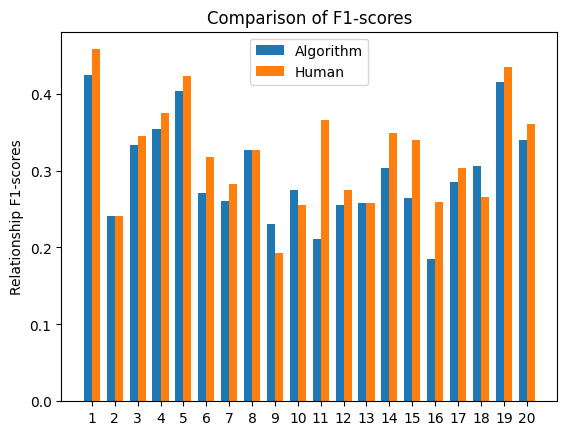

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

categories = [i+1 for i in range(20)]
x = np.arange(20)  # the label locations

# Width of the bars
width = 0.35  

# Creating the figure and axes objects
fig, ax = plt.subplots()

pos = 8

# Plotting bars
bars1 = ax.bar(x - width/2, df_algo.iloc[pos], width, label='Algorithm')
bars2 = ax.bar(x + width/2, df_human.iloc[pos], width, label='Human')

# Adding labels, title, and legend
ax.set_ylabel('Relationship F1-scores')
ax.set_title('Comparison of F1-scores')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Displaying the plot
plt.show()


# internal Grade

In [ ]:
algo_grade_string = "0.7491996667	0.647795	0.6456308333	0.6629838333	0.7705303333	0.75371	0.6822591667	0.6525065	0.6700983333	0.6942336667	0.5760203333	0.6222336667	0.6781621667	0.6179805	0.6579758333	0.6256706667	0.6925691667	0.6487613333	0.7294923333	0.6221436667"

In [ ]:
algo_grade = [float(i) for i in algo_grade_string.split("	")]

In [ ]:
human_grade_string ="0.7198063333	0.6347923333	0.6459235	0.6736916667	0.7941413333	0.7284586667	0.6781315	0.6199811667	0.6279058333	0.6667906667	0.5957883333	0.5939798333	0.6210818333	0.6025198333	0.677357	0.5349613333	0.6711901667	0.5740763333	0.701629	0.5661416667"

In [ ]:
human_grade = [float(i) for i in human_grade_string.split("	")]

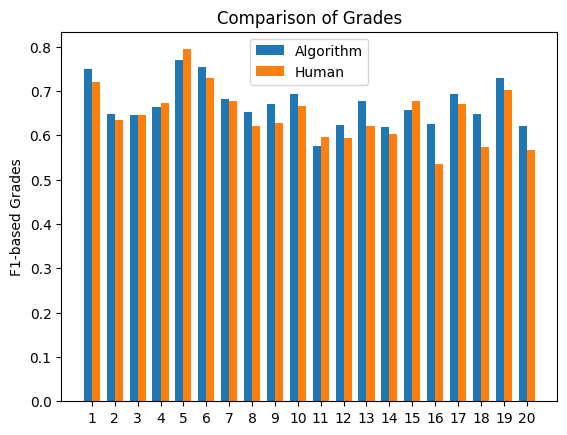

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

categories = [i+1 for i in range(20)]
x = np.arange(20)  # the label locations

# Width of the bars
width = 0.35  

# Creating the figure and axes objects
fig, ax = plt.subplots()

pos = 8

# Plotting bars
bars1 = ax.bar(x - width/2, algo_grade, width, label='Algorithm')
bars2 = ax.bar(x + width/2, human_grade, width, label='Human')

# Adding labels, title, and legend
ax.set_ylabel('F1-based Grades')
ax.set_title('Comparison of Grades')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Displaying the plot
plt.show()


In [99]:
algo_grade_string = "0.7491996667	0.647795	0.6456308333	0.6629838333	0.7705303333	0.75371	0.6822591667	0.6525065	0.6700983333	0.6942336667	0.5760203333	0.6222336667	0.6781621667	0.6179805	0.6579758333	0.6256706667	0.6925691667	0.6487613333	0.7294923333	0.6221436667"

In [100]:
algo_grade = [float(i) for i in algo_grade_string.split("	")]

In [107]:
younes_grade_string ="0.7569444444	0.7152777778	0.7083333333	0.5763888889	0.8194444444	0.6944444444	0.6736111111	0.7083333333	0.625	0.5625	0.6666666667	0.6111111111	0.7847222222	0.6388888889	0.6805555556	0.6041666667	0.7222222222	0.6527777778	0.7152777778	0.6388888889"

In [108]:
younes_grade = [float(i) for i in younes_grade_string.split("	")]

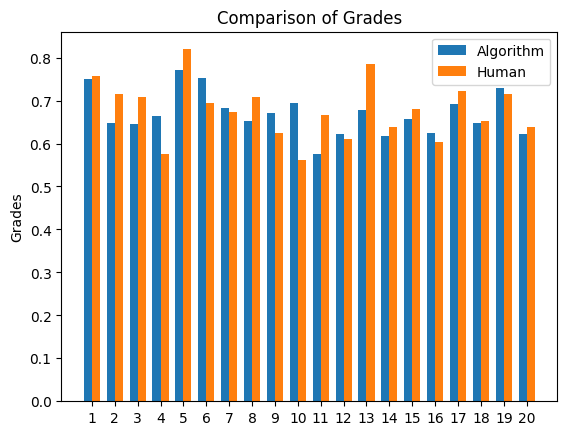

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

categories = [i+1 for i in range(20)]
x = np.arange(20)  # the label locations

# Width of the bars
width = 0.35  

# Creating the figure and axes objects
fig, ax = plt.subplots()

pos = 8

# Plotting bars
bars1 = ax.bar(x - width/2, algo_grade, width, label='Algorithm')
bars2 = ax.bar(x + width/2, younes_grade, width, label='Human')

# Adding labels, title, and legend
ax.set_ylabel('Grades')
ax.set_title('Comparison of Grades')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Displaying the plot
plt.show()


In [111]:
younes_letter = "8	7	7	4	9	6	6	7	5	4	6	5	8	5	6	5	7	6	7	5"
algo_letter = "7	5	5	6	8	8	6	6	6	6	4	5	6	5	6	5	6	5	7	5"

algo_letter_int = [float(i) for i in algo_letter.split("	")]
younes_letter_int = [float(i) for i in younes_letter.split("	")]

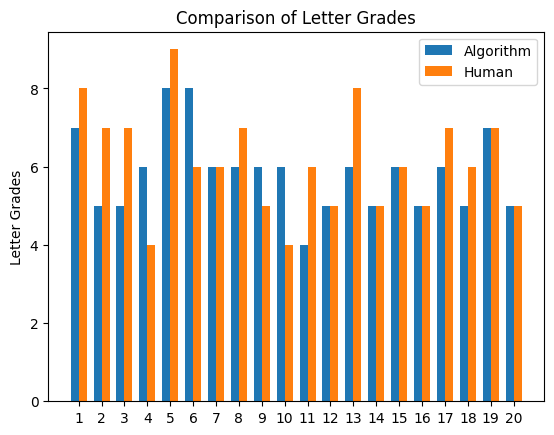

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

categories = [i+1 for i in range(20)]
x = np.arange(20)  # the label locations

# Width of the bars
width = 0.35  

# Creating the figure and axes objects
fig, ax = plt.subplots()

pos = 8

# Plotting bars
bars1 = ax.bar(x - width/2, algo_letter_int, width, label='Algorithm')
bars2 = ax.bar(x + width/2, younes_letter_int, width, label='Human')

# Adding labels, title, and legend
ax.set_ylabel('Letter Grades')
ax.set_title('Comparison of Letter Grades')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Displaying the plot
plt.show()
